# Bibliotecas para os gráficos

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Fazendo a conexão e escolhendo as colunas das tabelas do SQL para criar o dataset

In [2]:
connection = sqlite3.connect('video_games.db')


# query para escolher as colunas e renomear elas, fazendo um join para juntar as tabelas
sql_query = """
    SELECT  g.name AS game_name, g.year AS game_year, g.genre AS game_genre, g.publisher AS game_publisher,
           p.platform_name, p.manufacturer AS platform_manufacturer,
           s.na_sales AS north_america_sales, s.eu_sales AS europe_sales, s.jp_sales AS japan_sales, s.other_sales AS rest_of_the_world_sales, s.global_sales
    FROM games g
    JOIN platforms p ON g.platform_id = p.platform_id
    LEFT JOIN sales s ON g.game_id = s.game_id;
"""

video_games_sales = pd.read_sql_query(sql_query, connection)

connection.close()

# Dataset

In [3]:
# 5 linhas aleatórias do dataset
video_games_sales.sample(5)

,game_name,game_year,game_genre,game_publisher,platform_name,platform_manufacturer,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
8346,Gundam Assault Survive,2010.0,Action,Namco Bandai Games,PSP,Sony,0.00,0.00,0.17,0.00,0.17
2810,DiRT 3,2011.0,Racing,Codemasters,X360,Microsoft,0.23,0.41,0.01,0.08,0.73
8759,Saturn Bomberman,1996.0,Puzzle,Sega,SAT,Sega,0.00,0.00,0.15,0.00,0.15
8392,Off-World Interceptor Extreme,1995.0,Racing,Crystal Dynamics,PS,Sony,0.09,0.06,0.00,0.01,0.17
16074,Umihara Kawase Jun: Second Edition Kanzenban,2009.0,Puzzle,Genterprise,DS,Nintendo,0.00,0.00,0.01,0.00,0.01


In [4]:
# todas as linhas que contêm o jogo Call of Duty: Black Ops II
video_games_sales.loc[video_games_sales['game_name'] == 'Call of Duty: Black Ops II']

,game_name,game_year,game_genre,game_publisher,platform_name,platform_manufacturer,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
34,Call of Duty: Black Ops II,2012.0,Shooter,Activision,PS3,Sony,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,2012.0,Shooter,Activision,X360,Microsoft,8.25,4.30,0.07,1.12,13.73
1217,Call of Duty: Black Ops II,2012.0,Shooter,Activision,PC,PC,0.63,0.69,0.00,0.21,1.53
4554,Call of Duty: Black Ops II,2012.0,Shooter,Activision,WiiU,Nintendo,0.21,0.18,0.00,0.03,0.43


In [5]:
# quantidade de jogos no dataset (desconsiderando as múltiplas vezes que um jogo aparece por causa de diferentes plataformas)
len(video_games_sales['game_name'].unique())

11493

In [6]:
video_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_name                16598 non-null  object 
 1   game_year                16327 non-null  float64
 2   game_genre               16598 non-null  object 
 3   game_publisher           16598 non-null  object 
 4   platform_name            16598 non-null  object 
 5   platform_manufacturer    16598 non-null  object 
 6   north_america_sales      16598 non-null  float64
 7   europe_sales             16598 non-null  float64
 8   japan_sales              16598 non-null  float64
 9   rest_of_the_world_sales  16598 non-null  float64
 10  global_sales             16598 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
video_games_sales.describe()

,game_year,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Correções e limpeza do Dataset

In [8]:
# quantidade de valores nulos
video_games_sales.isnull().sum()

game_name                    0
game_year                  271
game_genre                   0
game_publisher               0
platform_name                0
platform_manufacturer        0
north_america_sales          0
europe_sales                 0
japan_sales                  0
rest_of_the_world_sales      0
global_sales                 0
dtype: int64

In [9]:
# vendo alguns exemplos de jogos sem ano
video_games_sales.loc[video_games_sales['game_year'].isna()].head()

,game_name,game_year,game_genre,game_publisher,platform_name,platform_manufacturer,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
179,Madden NFL 2004,NaN,Sports,Electronic Arts,PS2,Sony,4.26,0.26,0.01,0.71,5.23
377,FIFA Soccer 2004,NaN,Sports,Electronic Arts,PS2,Sony,0.59,2.36,0.04,0.51,3.49
431,LEGO Batman: The Videogame,NaN,Action,Warner Bros. Interactive Entertainment,Wii,Nintendo,1.86,1.02,0.00,0.29,3.17
470,wwe Smackdown vs. Raw 2006,NaN,Fighting,N/A,PS2,Sony,1.57,1.02,0.00,0.41,3.00
607,Space Invaders,NaN,Shooter,Atari,2600,Atari,2.36,0.14,0.00,0.03,2.53


In [10]:
# o jogo Madden aparece mais vezes no dataset, e nas outras, tem ano
video_games_sales.loc[video_games_sales['game_name'] == 'Madden NFL 2004']

,game_name,game_year,game_genre,game_publisher,platform_name,platform_manufacturer,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
179,Madden NFL 2004,NaN,Sports,Electronic Arts,PS2,Sony,4.26,0.26,0.01,0.71,5.23
1881,Madden NFL 2004,2003.0,Sports,Electronic Arts,XB,Microsoft,1.02,0.02,0.00,0.05,1.09
3896,Madden NFL 2004,2003.0,Sports,Electronic Arts,GC,Nintendo,0.40,0.10,0.00,0.01,0.51
5712,Madden NFL 2004,2003.0,Sports,Electronic Arts,GBA,Nintendo,0.22,0.08,0.00,0.01,0.31


In [11]:
# como é possível quue tenha outros jogos além do Madden com o mesmo problema, é possível preencher o jogo sem ano
# com o ano mais recente disponível para cada jogo, que tenha um ano e tenha o mesmo nome que outro
video_games_sales['game_year'] = video_games_sales.groupby('game_name')['game_year'].transform(lambda x: x.fillna(x.max()))

# ainda ficam alguns jogos sem ano, por não terem outros jogos iguais e com ano
video_games_sales.isnull().sum()

game_name                    0
game_year                  147
game_genre                   0
game_publisher               0
platform_name                0
platform_manufacturer        0
north_america_sales          0
europe_sales                 0
japan_sales                  0
rest_of_the_world_sales      0
global_sales                 0
dtype: int64

In [12]:
# agora o jogo Madden, e outros com o mesmo problema, tem o ano definido
video_games_sales.loc[video_games_sales['game_name'] == 'Madden NFL 2004']

,game_name,game_year,game_genre,game_publisher,platform_name,platform_manufacturer,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
179,Madden NFL 2004,2003.0,Sports,Electronic Arts,PS2,Sony,4.26,0.26,0.01,0.71,5.23
1881,Madden NFL 2004,2003.0,Sports,Electronic Arts,XB,Microsoft,1.02,0.02,0.00,0.05,1.09
3896,Madden NFL 2004,2003.0,Sports,Electronic Arts,GC,Nintendo,0.40,0.10,0.00,0.01,0.51
5712,Madden NFL 2004,2003.0,Sports,Electronic Arts,GBA,Nintendo,0.22,0.08,0.00,0.01,0.31


In [13]:
# deletando as linhas com o ano nulo
index_year = video_games_sales[video_games_sales['game_year'].isna()].index
video_games_sales.drop(index_year, inplace=True)
video_games_sales.isnull().sum()

game_name                  0
game_year                  0
game_genre                 0
game_publisher             0
platform_name              0
platform_manufacturer      0
north_america_sales        0
europe_sales               0
japan_sales                0
rest_of_the_world_sales    0
global_sales               0
dtype: int64

In [14]:
# no dataset, tem dois valores para um jogo sem a distribuidora, unknown e N/A
print('Distribuidora N/A: ', (video_games_sales['game_publisher'] == 'N/A').sum())
print('Distribuidora Unknown: ', (video_games_sales['game_publisher'] == 'Unknown').sum())

Distribuidora N/A:  42
Distribuidora Unknown:  144


In [15]:
# como são poucos jogos, é possível retirar as linhas
index_unk = video_games_sales[video_games_sales['game_publisher'] == 'Unknown'].index
video_games_sales.drop(index_unk, inplace=True)

index_na = video_games_sales[video_games_sales['game_publisher'] == 'N/A'].index
video_games_sales.drop(index_na, inplace=True)

In [16]:
print('Distribuidora N/A: ', (video_games_sales['game_publisher'] == 'N/A').sum())
print('Distribuidora Unknown: ', (video_games_sales['game_publisher'] == 'Unknown').sum())

Distribuidora N/A:  0
Distribuidora Unknown:  0


# Gráficos e análise os dados

## Quantidade no Dataset

In [17]:
# mesmo após a limpeza e correção do dataset, ainda ficou uma grande quantidade de dados
print('Quantidade de jogos: ', len(video_games_sales['game_name'].unique()))
print('Quantidade de plataformas: ', len(video_games_sales['platform_name'].unique()))
print('Quantidade de fabricantes de plataformas: ', len(video_games_sales['platform_manufacturer'].unique()))
print('Quantidade de distribuidoras: ', len(video_games_sales['game_publisher'].unique()))
print('Quantidade de gêneros: ', len(video_games_sales['game_genre'].unique()))
print('Ano com o jogo mais antigo: ', video_games_sales['game_year'].min())
print('Ano com o jogo mais recente: ', video_games_sales['game_year'].max())

Quantidade de jogos:  11247
Quantidade de plataformas:  31
Quantidade de fabricantes de plataformas:  10
Quantidade de distribuidoras:  575
Quantidade de gêneros:  12
Ano com o jogo mais antigo:  1980.0
Ano com o jogo mais recente:  2020.0


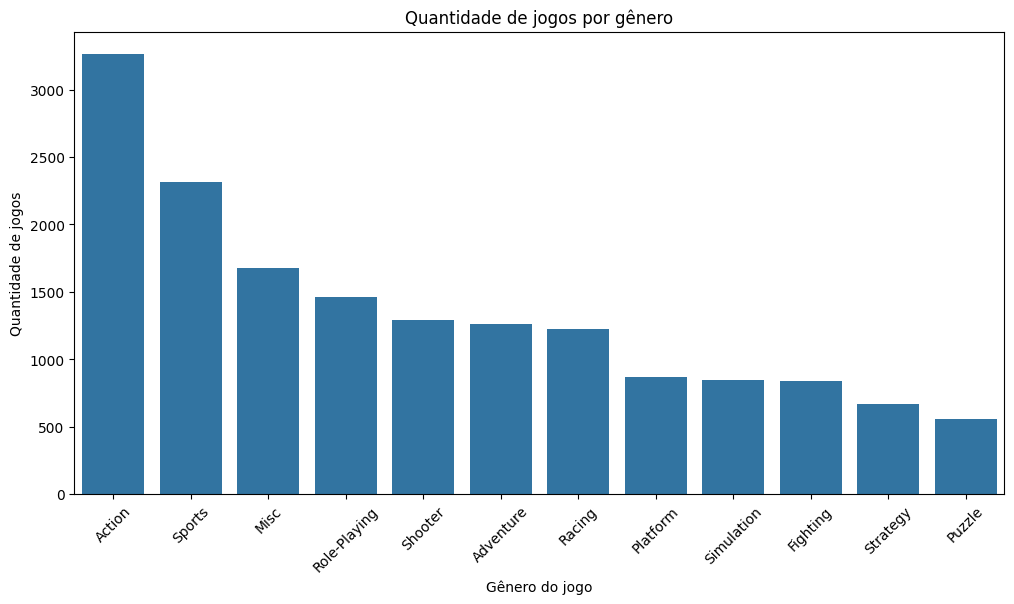

In [18]:
plt.figure(figsize=(12, 6));
sns.countplot(x=video_games_sales['game_genre'], order=video_games_sales['game_genre'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Quantidade de jogos por gênero');
plt.xlabel('Gênero do jogo');
plt.ylabel('Quantidade de jogos');

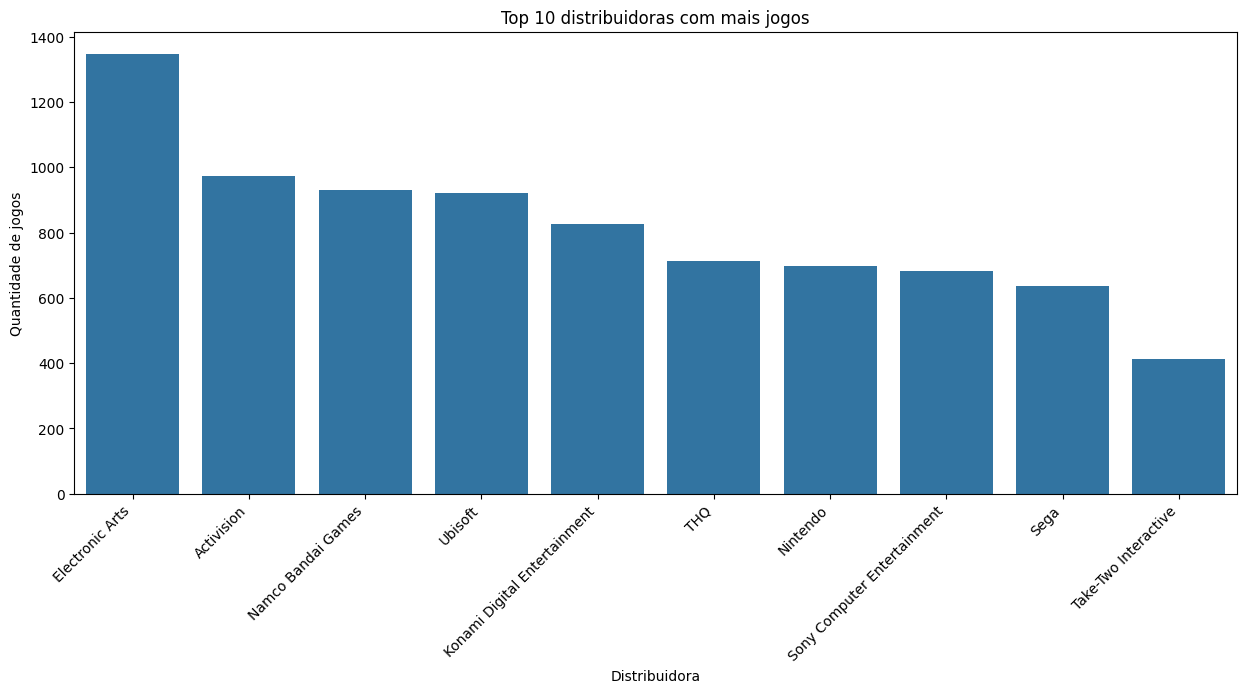

In [19]:
# 10 distribuidoras com mais jogos lançados (contando em diferentes plataformas)
top_publishers = video_games_sales.groupby('game_publisher')['game_name'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 6));
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xticks(rotation=45, ha='right');
plt.title('Top 10 distribuidoras com mais jogos');
plt.xlabel('Distribuidora');
plt.ylabel('Quantidade de jogos');

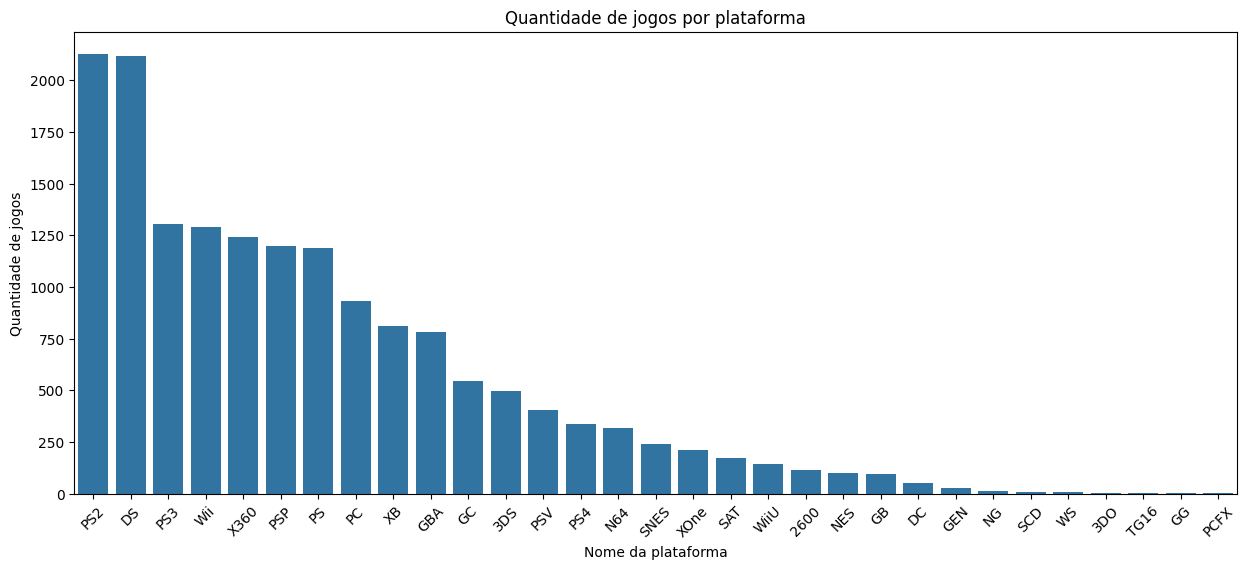

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x= video_games_sales['platform_name'], order= video_games_sales['platform_name'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Quantidade de jogos por plataforma');
plt.xlabel('Nome da plataforma');
plt.ylabel('Quantidade de jogos');

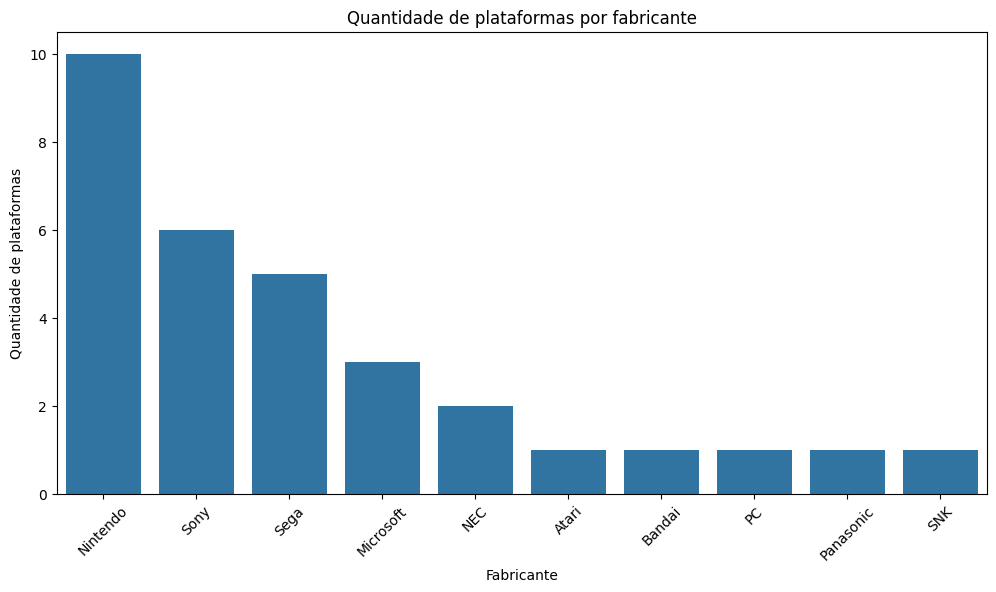

In [21]:
# selecionando a quantidade de plataformas que uma fabricante tem
quant_manufacter = video_games_sales.groupby('platform_manufacturer')['platform_name'].nunique()
quant_manufacter = quant_manufacter.sort_values(ascending=False)

plt.figure(figsize=(12, 6));
sns.barplot(x=quant_manufacter.index, y=quant_manufacter.values, order=quant_manufacter.index);
plt.xticks(rotation=45);
plt.title('Quantidade de plataformas por fabricante');
plt.xlabel('Fabricante');
plt.ylabel('Quantidade de plataformas');

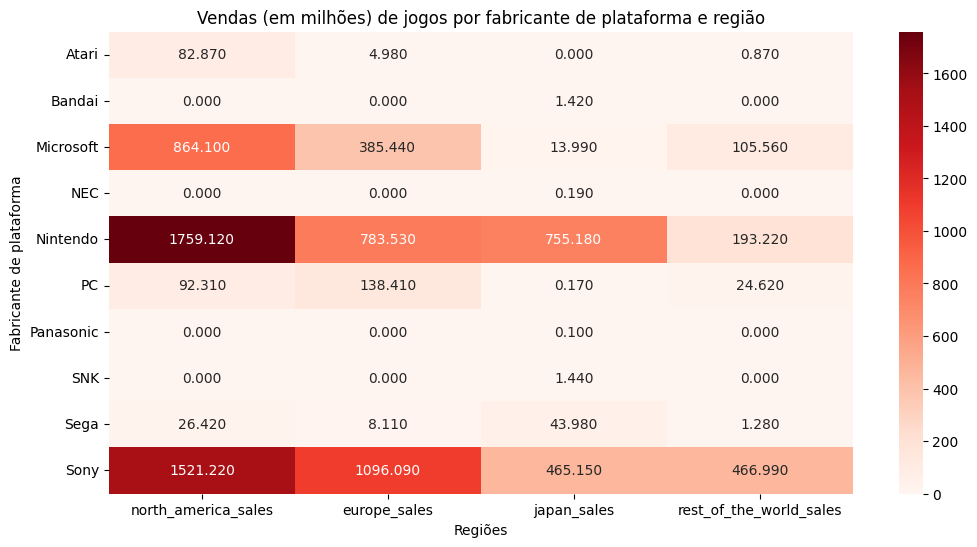

In [22]:
# seleciona as colunas dos fabricantes de plataformas e as vendas em diferentes regiões.
comp_manufacturer = video_games_sales[['platform_manufacturer', 'north_america_sales', 'europe_sales', 'japan_sales', 'rest_of_the_world_sales']]

# agrupa os dados pela fabricante de plataforma e soma as vendas em cada região para cada fabricante.
comp_manufacturer_sum = comp_manufacturer.groupby(by=['platform_manufacturer']).sum()

plt.figure(figsize=(12, 6))
sns.heatmap(comp_manufacturer_sum, annot=True, fmt = '.3f', cmap='Reds');
plt.title('Vendas (em milhões) de jogos por fabricante de plataforma e região');
plt.xlabel('Regiões');
plt.ylabel('Fabricante de plataforma');

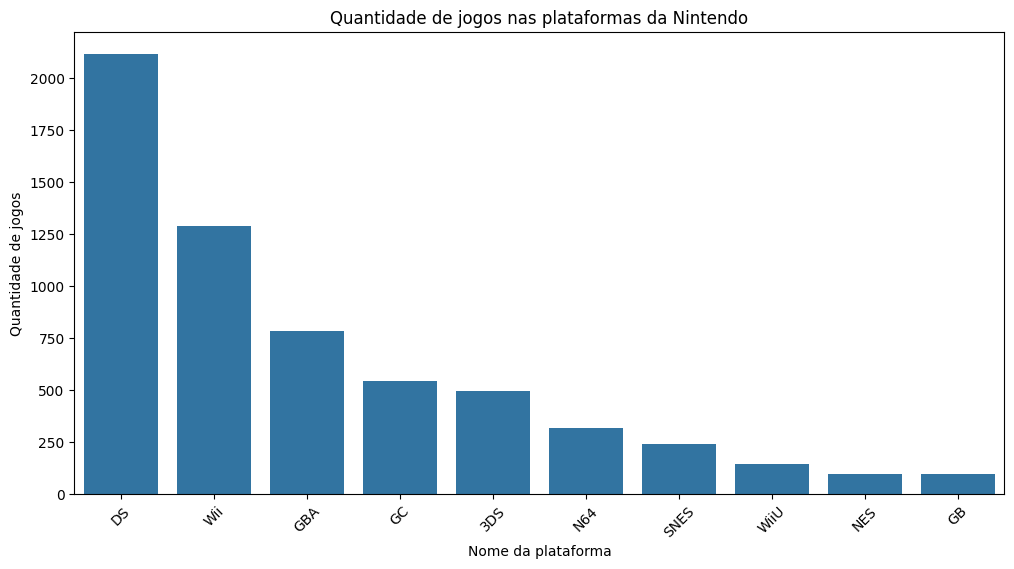

In [23]:
# selecionando somente os jogos lançados em plataformas da Nintendo
nintendo = video_games_sales.loc[video_games_sales['platform_manufacturer'] == 'Nintendo']

plt.figure(figsize=(12, 6))
sns.countplot(x=nintendo['platform_name'], order=nintendo['platform_name'].value_counts().index);
plt.xticks(rotation=45);
plt.title('Quantidade de jogos nas plataformas da Nintendo');
plt.xlabel('Nome da plataforma');
plt.ylabel('Quantidade de jogos');

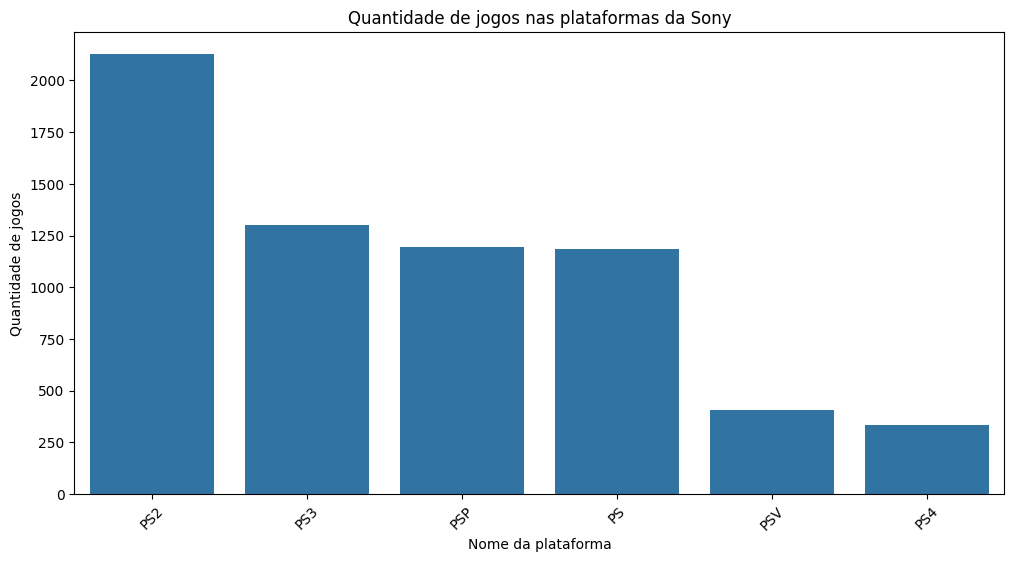

In [24]:
# selecionando somente os jogos lançados em plataformas da Sony
sony = video_games_sales.loc[video_games_sales['platform_manufacturer'] == 'Sony']

plt.figure(figsize=(12, 6))
sns.countplot(x=sony['platform_name'], order=sony['platform_name'].value_counts().index);
plt.xticks(rotation=45);
plt.title('Quantidade de jogos nas plataformas da Sony');
plt.xlabel('Nome da plataforma');
plt.ylabel('Quantidade de jogos');

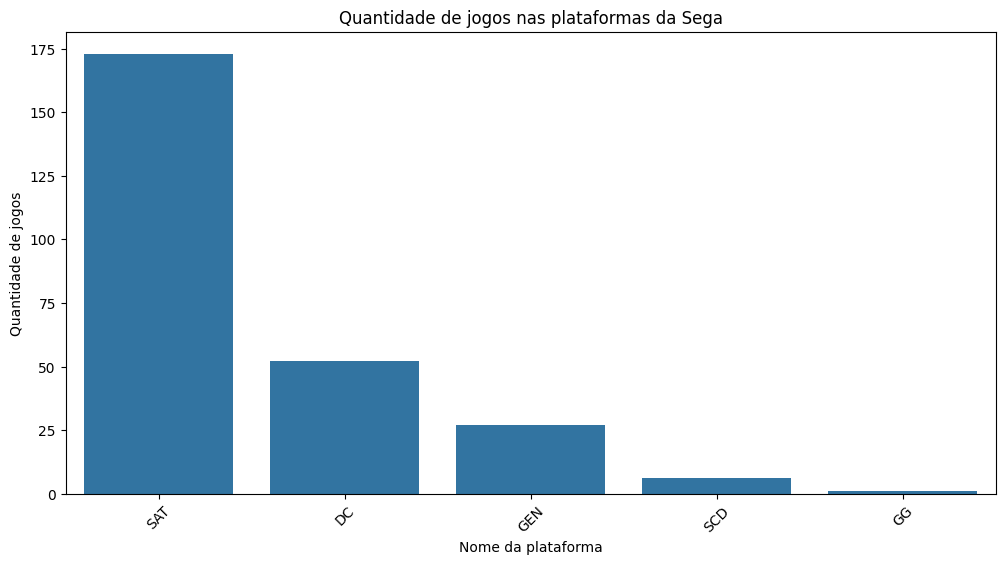

In [25]:
# selecionando somente os jogos lançados em plataformas da Sega
sega = video_games_sales.loc[video_games_sales['platform_manufacturer'] == 'Sega']

plt.figure(figsize=(12, 6))
sns.countplot(x=sega['platform_name'], order=sega['platform_name'].value_counts().index);
plt.xticks(rotation=45);
plt.title('Quantidade de jogos nas plataformas da Sega');
plt.xlabel('Nome da plataforma');
plt.ylabel('Quantidade de jogos');

## Relações com a quantidade de vendas no mundo inteiro

In [26]:
graph = px.treemap(video_games_sales, path=['platform_manufacturer', 'platform_name', 'game_genre'], values='global_sales',
                   title= 'Gêneros de jogos mais vendidos no mundo inteiro por console e fabricante da plataforma')
graph.show()

## Vendas por gênero de jogo por cada região

In [27]:
graph = px.pie(video_games_sales, values='global_sales', names='game_genre',
               title='Participação de vendas globais por gênero de jogo')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

In [28]:
graph = px.pie(video_games_sales, values='north_america_sales', names='game_genre',
               title='Participação de vendas na América do Norte por gênero de jogo')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

In [29]:
graph = px.pie(video_games_sales, values='europe_sales', names='game_genre',
               title='Participação de vendas na Europa por gênero de jogo')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

In [30]:
graph = px.pie(video_games_sales, values='japan_sales', names='game_genre',
               title='Participação de vendas no Japão por gênero de jogo')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

In [31]:
graph = px.pie(video_games_sales, values='rest_of_the_world_sales', names='game_genre',
               title='Participação de vendas no resto do mundo por gênero de jogo')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

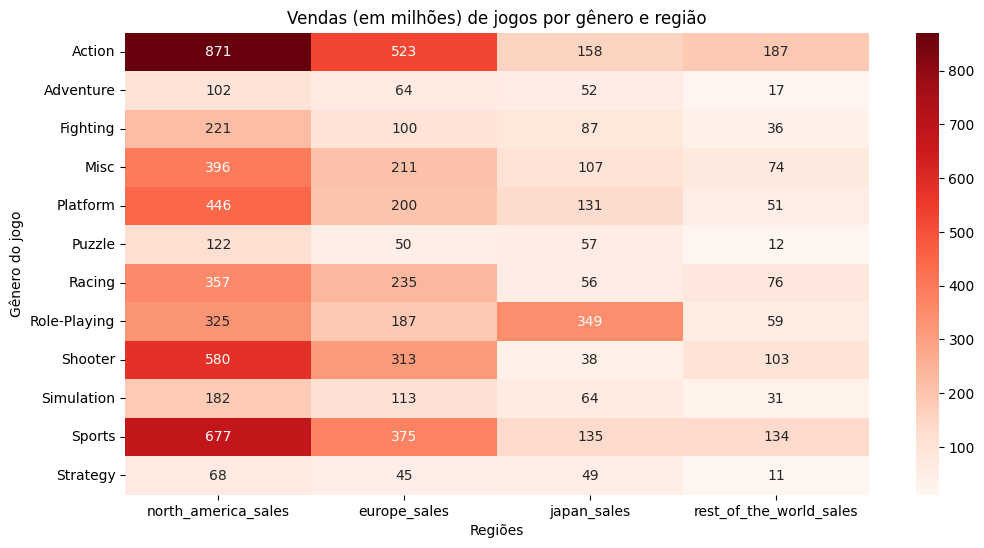

In [32]:
# seleciona as colunas dos gêneros dos jogos e as vendas em diferentes regiões.
comp_genre = video_games_sales[['game_genre', 'north_america_sales', 'europe_sales', 'japan_sales', 'rest_of_the_world_sales']]

# agrupa os dados pelo gênero do jogo e soma as vendas em cada região para cada gênero.
comp_genre_sum = comp_genre.groupby(by=['game_genre']).sum()

plt.figure(figsize=(12, 6))
sns.heatmap(comp_genre_sum, annot=True, fmt = '.0f', cmap='Reds');
plt.title('Vendas (em milhões) de jogos por gênero e região');
plt.xlabel('Regiões');
plt.ylabel('Gênero do jogo');

## Quantidade de jogos lançados por ano

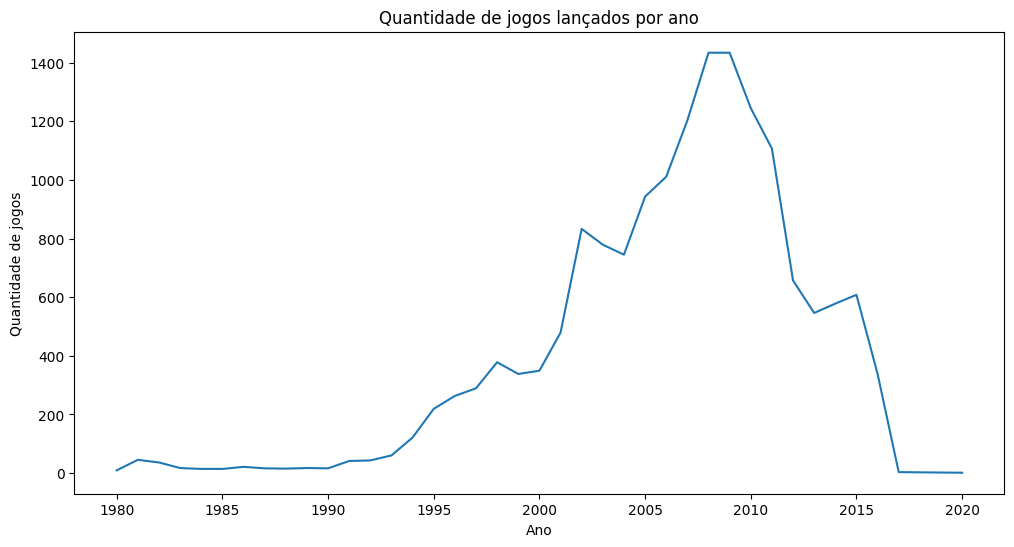

In [33]:
# conta a quantidade de jogos por ano
games_per_year = video_games_sales.groupby('game_year')['game_name'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values);
plt.title('Quantidade de jogos lançados por ano');
plt.xlabel('Ano');
plt.ylabel('Quantidade de jogos');

## Renda total de jogos por região em cada ano

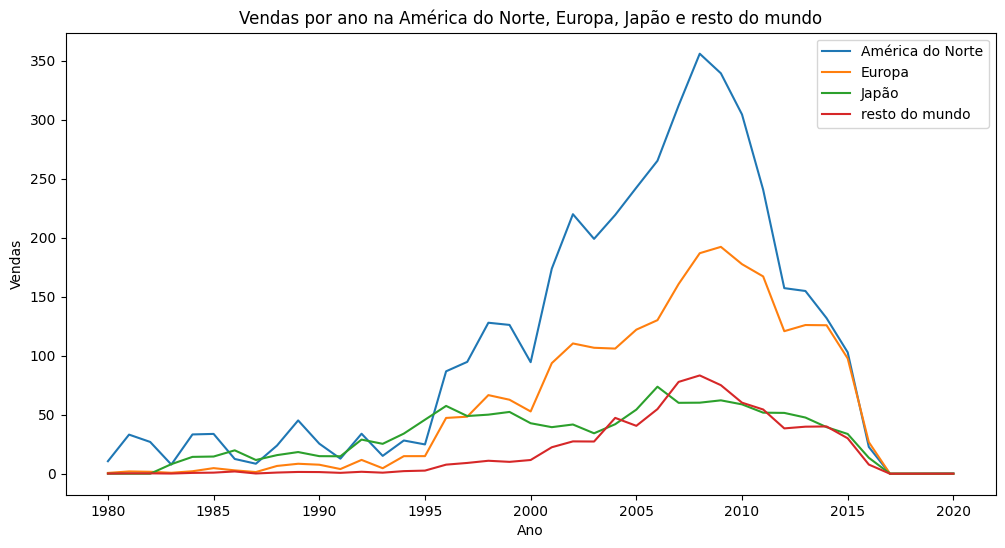

In [34]:
# agrupa e soma as vendas por ano e região
games_per_year_na = video_games_sales.groupby('game_year')['north_america_sales'].sum()
games_per_year_eu = video_games_sales.groupby('game_year')['europe_sales'].sum()
games_per_year_jp = video_games_sales.groupby('game_year')['japan_sales'].sum()
games_per_year_other = video_games_sales.groupby('game_year')['rest_of_the_world_sales'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year_na.index, y=games_per_year_na.values, label='América do Norte');
sns.lineplot(x=games_per_year_eu.index, y=games_per_year_eu.values, label='Europa');
sns.lineplot(x=games_per_year_jp.index, y=games_per_year_jp.values, label='Japão');
sns.lineplot(x=games_per_year_other.index, y=games_per_year_other.values, label='resto do mundo');
plt.title('Vendas por ano na América do Norte, Europa, Japão e resto do mundo');
plt.xlabel('Ano');
plt.ylabel('Vendas');

## Plataformas com maior faturamento por região

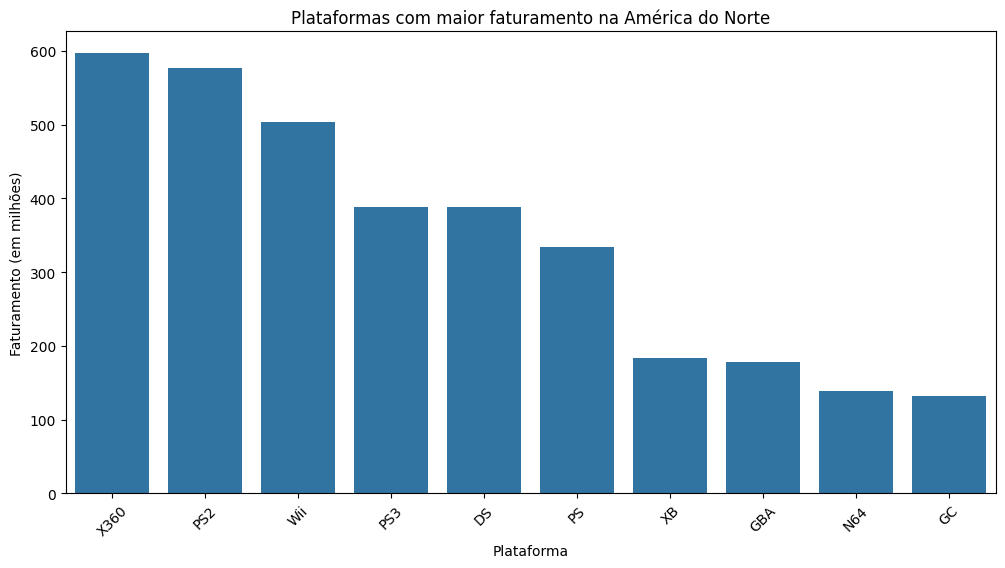

In [35]:
# 10 plataformas com maior faturamento na América do Norte
north_america_platform = video_games_sales.groupby('platform_name')['north_america_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=north_america_platform.index, y=north_america_platform.values);
plt.xticks(rotation=45);
plt.title('Plataformas com maior faturamento na América do Norte');
plt.xlabel('Plataforma');
plt.ylabel('Faturamento (em milhões)');

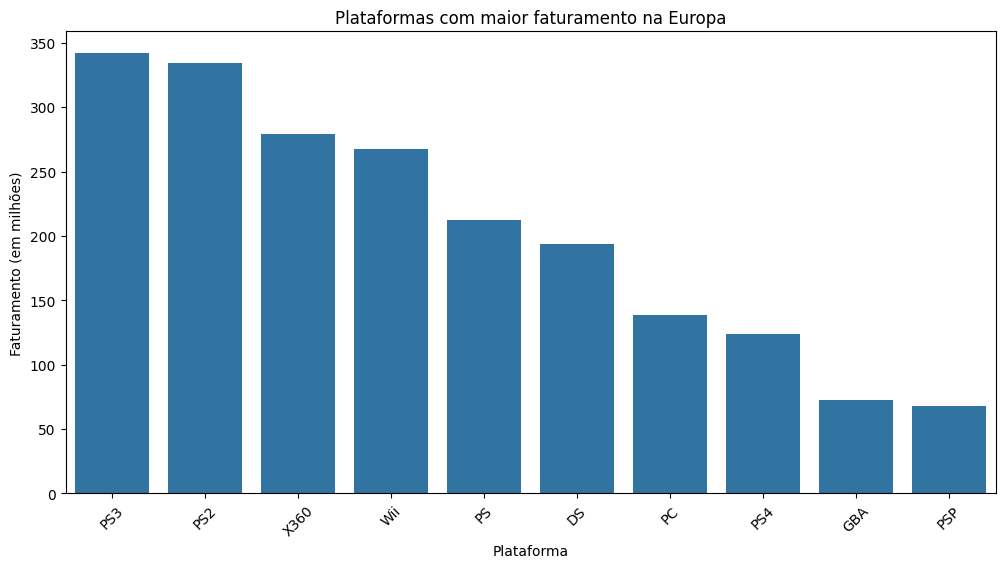

In [36]:
# 10 plataformas com maior faturamento na Europa
europe_platform = video_games_sales.groupby('platform_name')['europe_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=europe_platform.index, y=europe_platform.values);
plt.xticks(rotation=45);
plt.title('Plataformas com maior faturamento na Europa');
plt.xlabel('Plataforma');
plt.ylabel('Faturamento (em milhões)');

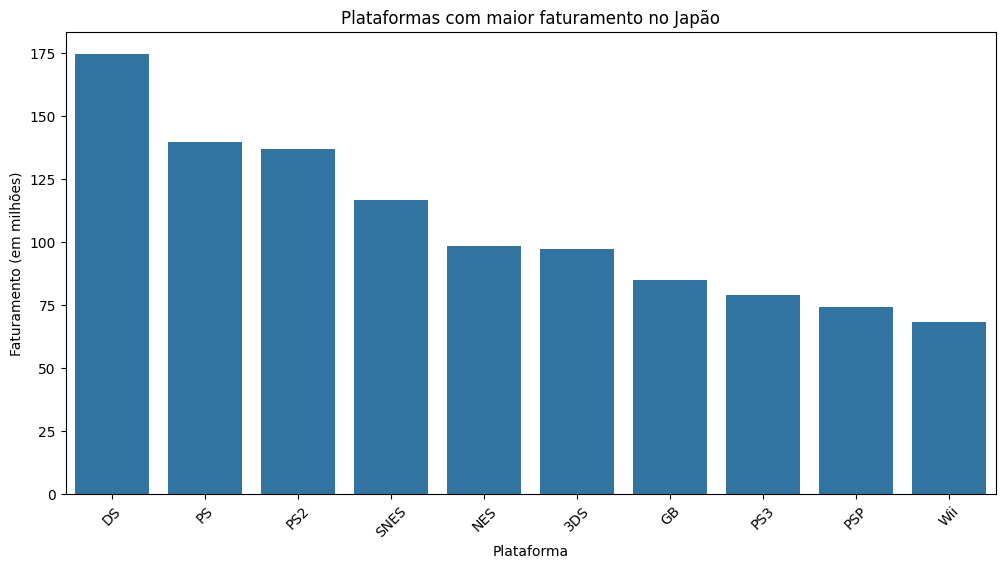

In [37]:
# 10 plataformas com maior faturamento no Japão
japan_platform = video_games_sales.groupby('platform_name')['japan_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=japan_platform.index, y=japan_platform.values);
plt.xticks(rotation=45);
plt.title('Plataformas com maior faturamento no Japão');
plt.xlabel('Plataforma');
plt.ylabel('Faturamento (em milhões)');

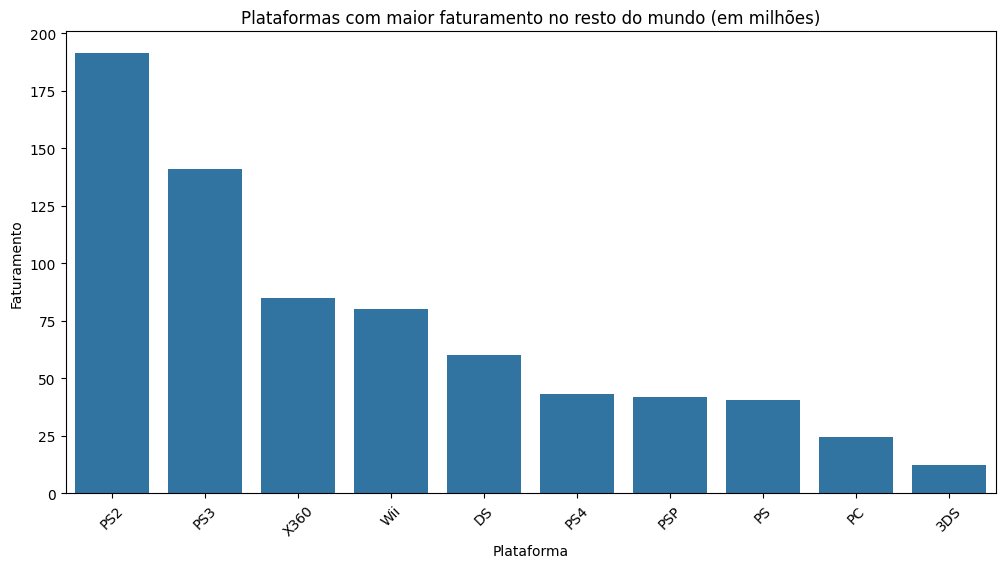

In [38]:
# 10 plataformas com maior faturamento no resto do mundo
rest_platform = video_games_sales.groupby('platform_name')['rest_of_the_world_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=rest_platform.index, y=rest_platform.values);
plt.xticks(rotation=45);
plt.title('Plataformas com maior faturamento no resto do mundo (em milhões)');
plt.xlabel('Plataforma');
plt.ylabel('Faturamento');

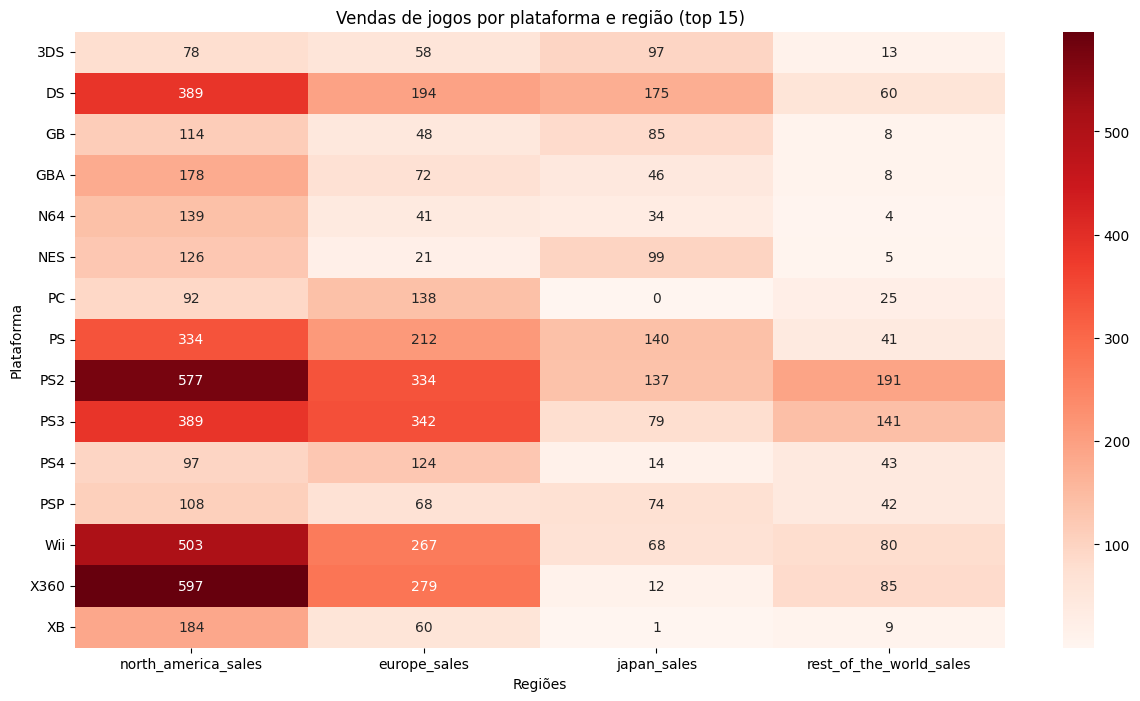

In [39]:
# seleciona as colunas das plataformas dos jogos e as vendas em diferentes regiões.
comp_platform = video_games_sales[['platform_name', 'north_america_sales', 'europe_sales', 'japan_sales', 'rest_of_the_world_sales', 'global_sales']]

# agrupa os dados pela plataforma do jogo e soma as vendas em cada região para cada gênero.
comp_platform_sum = comp_platform.groupby('platform_name').sum()

# seleciona as top 15 desenvolvedoras com mais vendas globais
top_platforms = comp_platform_sum.groupby('platform_name')['global_sales'].sum().sort_values(ascending=False).head(15).index

# filtra para incluir apenas essas desenvolvedoras
top_platforms_df = comp_platform[comp_platform['platform_name'].isin(top_platforms)]

# Agrupa e soma para as desenvolvedoras filtradas
top_platforms_sum = top_platforms_df.groupby('platform_name').sum()

# remove a coluna global_sales para o heatmap
top_platforms_sum = top_platforms_sum.drop(columns='global_sales')

plt.figure(figsize=(15, 8))
sns.heatmap(top_platforms_sum, annot=True, fmt = '.0f', cmap='Reds');
plt.yticks(rotation=0);
plt.title('Vendas de jogos por plataforma e região (top 15)');
plt.xlabel('Regiões');
plt.ylabel('Plataforma');

## Vendas dividas por distribuidoras

### Vendas globais

In [40]:
graph = px.pie(video_games_sales, values='global_sales', names='game_publisher',
               title='Participação de vendas no mundo por distribuidora de jogos')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

### Top 5 distribuidoras com mais vendas por região

In [41]:
publisher_sales = video_games_sales.groupby('game_publisher')['north_america_sales'].sum()
top_publishers = publisher_sales.sort_values(ascending=False).head(5)

graph = px.pie(values=top_publishers.values, names=top_publishers.index,
                    title='Participação de vendas na América do Norte por distribuidora de jogos (top 5)')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

In [42]:
publisher_sales = video_games_sales.groupby('game_publisher')['europe_sales'].sum()
top_publishers = publisher_sales.sort_values(ascending=False).head(5)

graph = px.pie(values=top_publishers.values, names=top_publishers.index,
                    title='Participação de vendas na Europa por distribuidora de jogos (top 5)')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

In [43]:
publisher_sales = video_games_sales.groupby('game_publisher')['japan_sales'].sum()
top_publishers = publisher_sales.sort_values(ascending=False).head(5)

graph = px.pie(values=top_publishers.values, names=top_publishers.index,
                    title='Participação de vendas no Japão por distribuidora de jogos (top 5)')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

In [44]:
publisher_sales = video_games_sales.groupby('game_publisher')['rest_of_the_world_sales'].sum()
top_publishers = publisher_sales.sort_values(ascending=False).head(5)

graph = px.pie(values=top_publishers.values, names=top_publishers.index,
                    title='Participação de vendas no resto do mundo por distribuidora de jogos (top 5)')
graph.update_traces(textposition='inside', textinfo='label+percent')
graph.show()

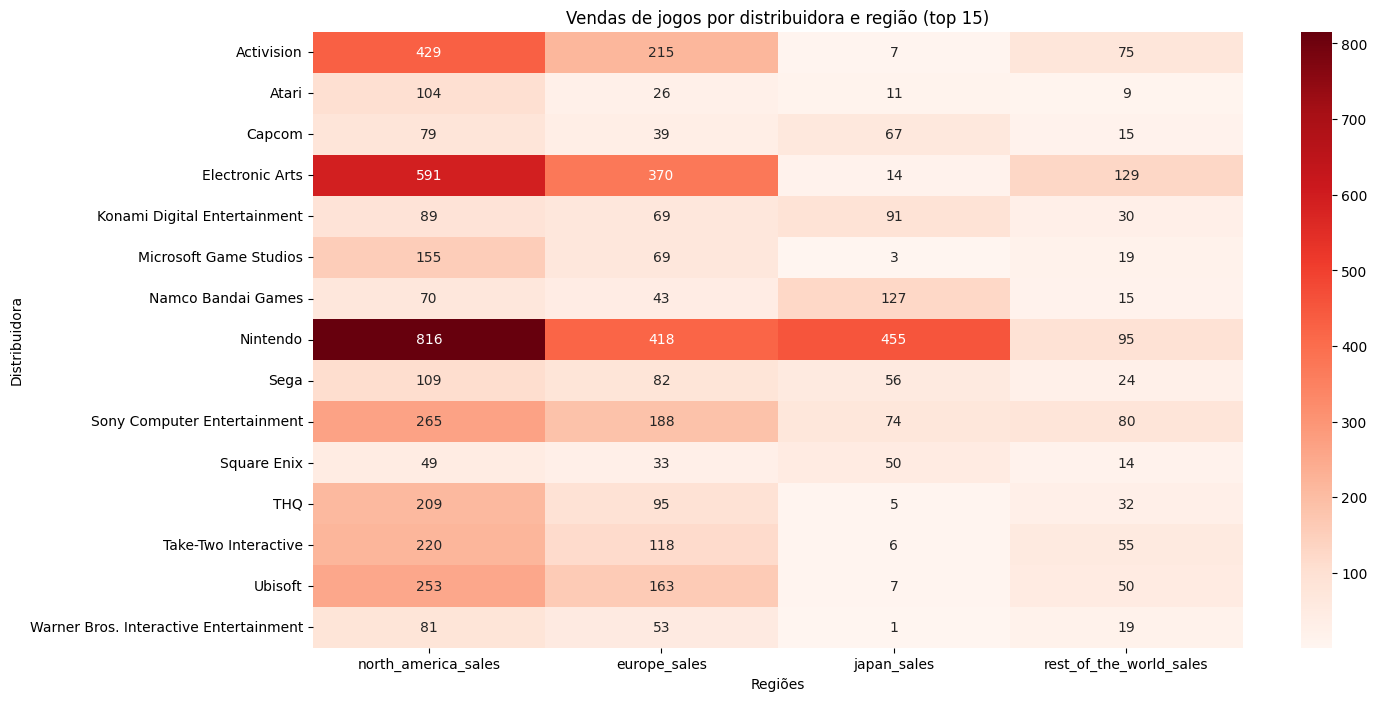

In [45]:
comp_publisher = video_games_sales[['game_publisher', 'north_america_sales', 'europe_sales', 'japan_sales', 'rest_of_the_world_sales', 'global_sales']]
comp_publisher_sum = comp_publisher.groupby('game_publisher').sum()

top_publishers = comp_publisher_sum.groupby('game_publisher')['global_sales'].sum().sort_values(ascending=False).head(15).index
top_publishers_df = comp_publisher[comp_publisher['game_publisher'].isin(top_publishers)]
top_publishers_sum = top_publishers_df.groupby('game_publisher').sum()
top_publishers_sum = top_publishers_sum.drop(columns='global_sales')

plt.figure(figsize=(15, 8))
sns.heatmap(top_publishers_sum, annot=True, fmt = '.0f', cmap='Reds');
plt.title('Vendas de jogos por distribuidora e região (top 15)');
plt.xlabel('Regiões');
plt.ylabel('Distribuidora');

## 5 jogos mais vendidos das 5 distribuidoras com maior renda por região

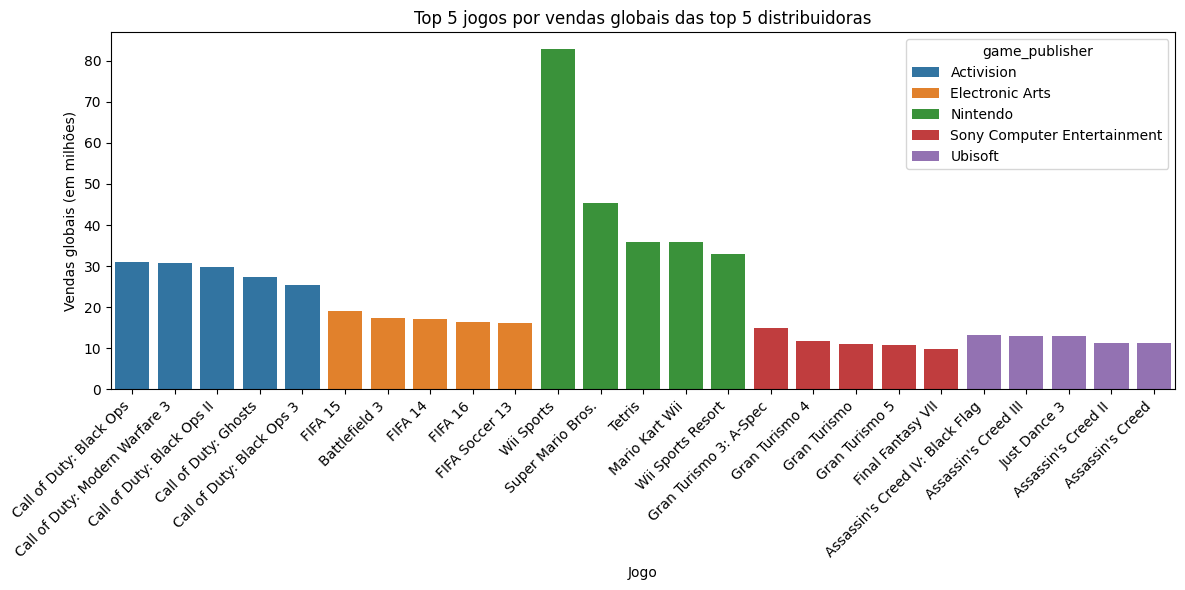

In [46]:
# seleciona as top 5 distribuidoras com mais vendas
top_publishers = video_games_sales.groupby('game_publisher')['global_sales'].sum().sort_values(ascending=False).head(5).index

# filtra para ter apenas os jogos das top 5 distribuidoras
top_publisher_games = video_games_sales[video_games_sales['game_publisher'].isin(top_publishers)]

# agrupa por jogo e soma as vendas na região (conta o mesmo jogo em diferentes plataformas)
top_games_by_publisher = top_publisher_games.groupby(['game_publisher', 'game_name'])['global_sales'].sum().reset_index()

# ordena por nome da distribuidora (a-z) e pelas vendas (decrescente)
top_games_by_publisher = top_games_by_publisher.sort_values(['game_publisher', 'global_sales'], ascending=[True, False])

# seleciona os top 5 jogos das distribuidoras selecionadas
top_5_games_by_publisher = top_games_by_publisher.groupby('game_publisher').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='game_name', y='global_sales',hue='game_publisher', data=top_5_games_by_publisher);
plt.xticks(rotation=45, ha='right');
plt.title('Top 5 jogos por vendas globais das top 5 distribuidoras');
plt.xlabel('Jogo');
plt.ylabel('Vendas globais (em milhões)');
plt.tight_layout();

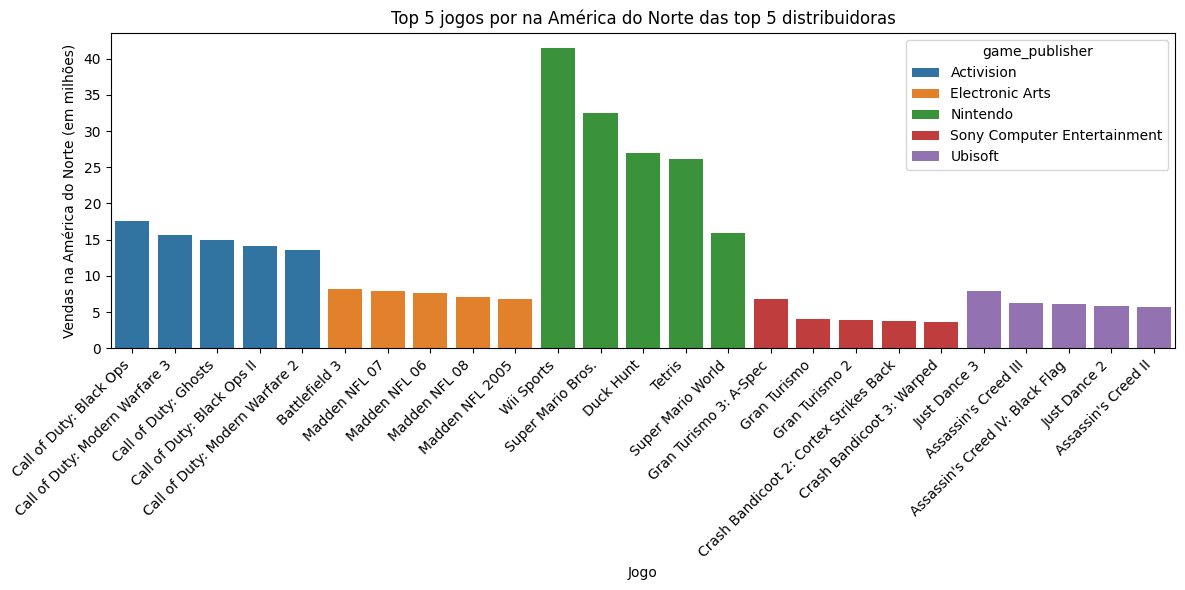

In [47]:
top_publishers = video_games_sales.groupby('game_publisher')['north_america_sales'].sum().sort_values(ascending=False).head(5).index
top_publisher_games = video_games_sales[video_games_sales['game_publisher'].isin(top_publishers)]
top_games_by_publisher = top_publisher_games.groupby(['game_publisher', 'game_name'])['north_america_sales'].sum().reset_index()
top_games_by_publisher = top_games_by_publisher.sort_values(['game_publisher', 'north_america_sales'], ascending=[True, False])
top_5_games_by_publisher = top_games_by_publisher.groupby('game_publisher').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='game_name', y='north_america_sales', hue='game_publisher', data=top_5_games_by_publisher);
plt.xticks(rotation=45, ha='right');
plt.title('Top 5 jogos por na América do Norte das top 5 distribuidoras');
plt.xlabel('Jogo');
plt.ylabel('Vendas na América do Norte (em milhões)');
plt.tight_layout();

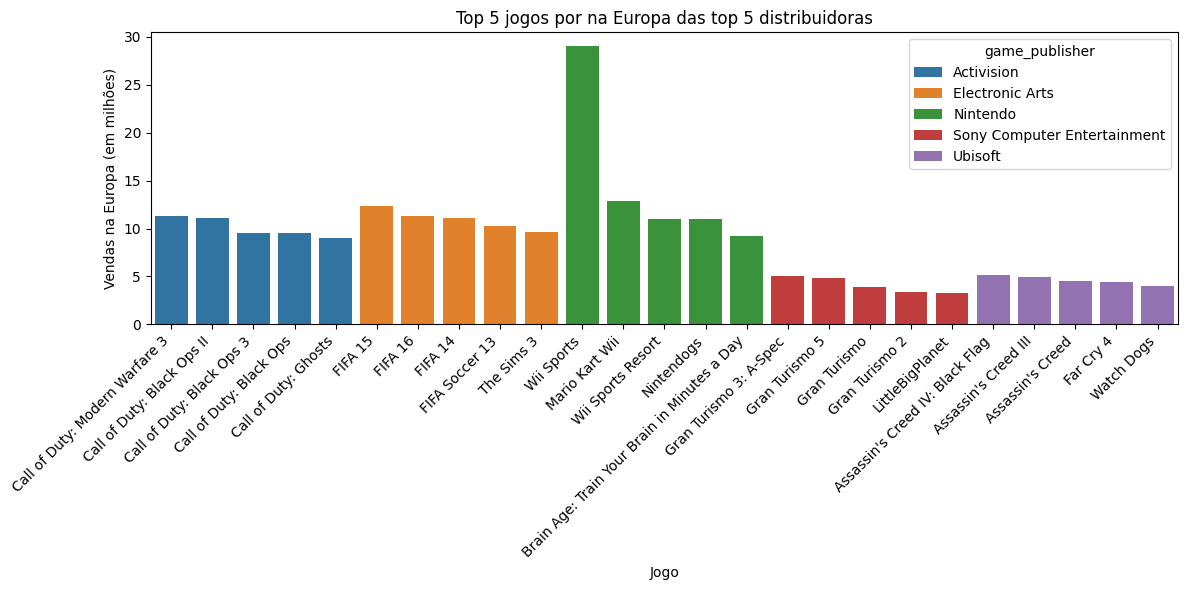

In [48]:
top_publishers = video_games_sales.groupby('game_publisher')['europe_sales'].sum().sort_values(ascending=False).head(5).index
top_publisher_games = video_games_sales[video_games_sales['game_publisher'].isin(top_publishers)]
top_games_by_publisher = top_publisher_games.groupby(['game_publisher', 'game_name'])['europe_sales'].sum().reset_index()
top_games_by_publisher = top_games_by_publisher.sort_values(['game_publisher', 'europe_sales'], ascending=[True, False])
top_5_games_by_publisher = top_games_by_publisher.groupby('game_publisher').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='game_name', y='europe_sales', hue='game_publisher', data=top_5_games_by_publisher);
plt.xticks(rotation=45, ha='right');
plt.title('Top 5 jogos por na Europa das top 5 distribuidoras');
plt.xlabel('Jogo');
plt.ylabel('Vendas na Europa (em milhões)');
plt.tight_layout();

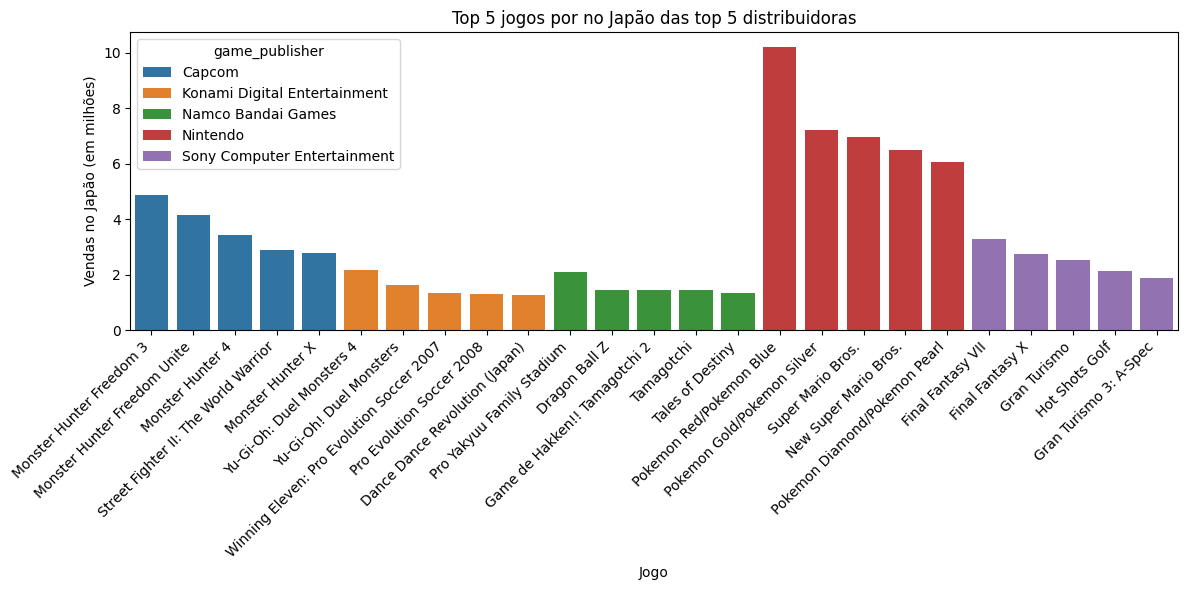

In [49]:
top_publishers = video_games_sales.groupby('game_publisher')['japan_sales'].sum().sort_values(ascending=False).head(5).index
top_publisher_games = video_games_sales[video_games_sales['game_publisher'].isin(top_publishers)]
top_games_by_publisher = top_publisher_games.groupby(['game_publisher', 'game_name'])['japan_sales'].sum().reset_index()
top_games_by_publisher = top_games_by_publisher.sort_values(['game_publisher', 'japan_sales'], ascending=[True, False])
top_5_games_by_publisher = top_games_by_publisher.groupby('game_publisher').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='game_name', y='japan_sales', hue='game_publisher', data=top_5_games_by_publisher);
plt.xticks(rotation=45, ha='right');
plt.title('Top 5 jogos por no Japão das top 5 distribuidoras');
plt.xlabel('Jogo');
plt.ylabel('Vendas no Japão (em milhões)');
plt.tight_layout();

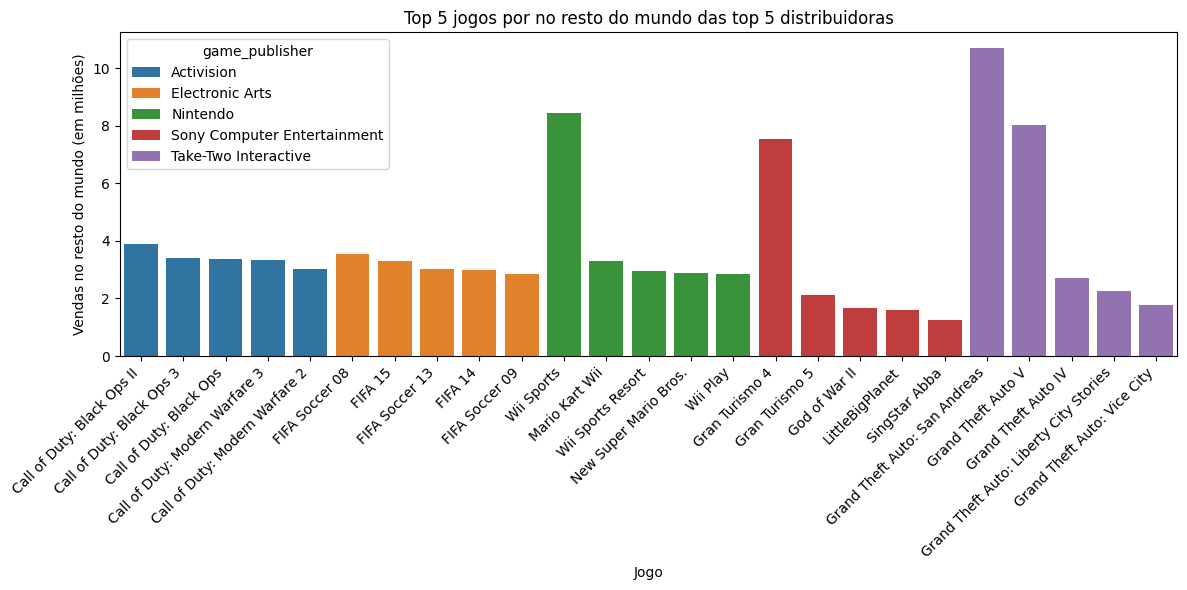

In [50]:
top_publishers = video_games_sales.groupby('game_publisher')['rest_of_the_world_sales'].sum().sort_values(ascending=False).head(5).index
top_publisher_games = video_games_sales[video_games_sales['game_publisher'].isin(top_publishers)]
top_games_by_publisher = top_publisher_games.groupby(['game_publisher', 'game_name'])['rest_of_the_world_sales'].sum().reset_index()
top_games_by_publisher = top_games_by_publisher.sort_values(['game_publisher', 'rest_of_the_world_sales'], ascending=[True, False])
top_5_games_by_publisher = top_games_by_publisher.groupby('game_publisher').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='game_name', y='rest_of_the_world_sales', hue='game_publisher', data=top_5_games_by_publisher);
plt.xticks(rotation=45, ha='right');
plt.title('Top 5 jogos por no resto do mundo das top 5 distribuidoras');
plt.xlabel('Jogo');
plt.ylabel('Vendas no resto do mundo (em milhões)');
plt.tight_layout();

# Retirar valores não úteis

In [51]:
video_games_sales

,game_name,game_year,game_genre,game_publisher,platform_name,platform_manufacturer,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
0,Wii Sports,2006.0,Sports,Nintendo,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,1985.0,Platform,Nintendo,NES,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008.0,Racing,Nintendo,Wii,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,2009.0,Sports,Nintendo,Wii,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,GB,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,2002.0,Platform,Kemco,GBA,Nintendo,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,2003.0,Shooter,Infogrames,GC,Nintendo,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,2008.0,Racing,Activision,PS2,Sony,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,2010.0,Puzzle,7G//AMES,DS,Nintendo,0.00,0.01,0.00,0.00,0.01


In [52]:
video_games_sales.drop(['game_name'], axis=1, inplace=True)

In [53]:
video_games_sales.drop(['platform_manufacturer'], axis=1, inplace=True)

In [54]:
video_games_sales

,game_year,game_genre,game_publisher,platform_name,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
0,2006.0,Sports,Nintendo,Wii,41.49,29.02,3.77,8.46,82.74
1,1985.0,Platform,Nintendo,NES,29.08,3.58,6.81,0.77,40.24
2,2008.0,Racing,Nintendo,Wii,15.85,12.88,3.79,3.31,35.82
3,2009.0,Sports,Nintendo,Wii,15.75,11.01,3.28,2.96,33.00
4,1996.0,Role-Playing,Nintendo,GB,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,2002.0,Platform,Kemco,GBA,0.01,0.00,0.00,0.00,0.01
16594,2003.0,Shooter,Infogrames,GC,0.01,0.00,0.00,0.00,0.01
16595,2008.0,Racing,Activision,PS2,0.00,0.00,0.00,0.00,0.01
16596,2010.0,Puzzle,7G//AMES,DS,0.00,0.01,0.00,0.00,0.01


# Label Encoder

Para não criar diversas colunas, iremos utilizar o label encoder nas distribuidoras, mas será com base na renda global de cada, por exemplo, Nintendo ganhou mais de 500 milhões em vendas, então está em grupo, já a Konami, vendeu entre 251 - 500 milhões, então está em outro grupo.

In [55]:
# calcular a renda global por distribuidora
publisher_sales = video_games_sales.groupby('game_publisher')['global_sales'].sum().reset_index()
publisher_sales.columns = ['game_publisher', 'total_global_sales']

# intervalos e os rótulos para a renda global (em milhões)
bins = [0, 1, 5, 10, 50, 100, 250, 500, 2000]
labels = ['0-1', '2-5', '6-10', '11-50', '51-100', '101-250', '251-500', '501+']

# adiciona uma coluna ao publisher_sales com os rótulos, onde o valor é fechado a esquerda e aberto a direita = [a, b)
publisher_sales['interval'] = pd.cut(publisher_sales['total_global_sales'], bins=bins, labels=labels, right=False)

In [56]:
# número de desenvolvedoras em cada intervalo
interval_counts = publisher_sales['interval'].value_counts().sort_index()

interval_counts

interval
0-1        389
2-5        124
6-10        14
11-50       23
51-100       9
101-250      6
251-500      6
501+         4
Name: count, dtype: int64

In [57]:
# junção da coluna interval no dataset original com base no nome da distribuidora
video_games_sales = video_games_sales.merge(publisher_sales[['game_publisher', 'interval']], on='game_publisher', how='left')

In [58]:
# filtrar distribuidoras por algum intervalo
filtered_df = video_games_sales[video_games_sales['interval'] == '51-100']

unique_publishers = filtered_df['game_publisher'].unique()
unique_publishers

array(['Bethesda Softworks', 'SquareSoft', '505 Games', 'LucasArts',
       'Eidos Interactive', 'Vivendi Games', 'Acclaim Entertainment',
       'Midway Games', 'Tecmo Koei'], dtype=object)

Agora passando esses grupos para a categoria de desenvolvedoras no dataset original.

In [59]:
# troca a coluna game_publisher pelos intervalos
video_games_sales['game_publisher'] = video_games_sales['interval']
video_games_sales.drop(columns='interval', inplace=True)

In [60]:
video_games_sales

,game_year,game_genre,game_publisher,platform_name,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
0,2006.0,Sports,501+,Wii,41.49,29.02,3.77,8.46,82.74
1,1985.0,Platform,501+,NES,29.08,3.58,6.81,0.77,40.24
2,2008.0,Racing,501+,Wii,15.85,12.88,3.79,3.31,35.82
3,2009.0,Sports,501+,Wii,15.75,11.01,3.28,2.96,33.00
4,1996.0,Role-Playing,501+,GB,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16260,2002.0,Platform,2-5,GBA,0.01,0.00,0.00,0.00,0.01
16261,2003.0,Shooter,11-50,GC,0.01,0.00,0.00,0.00,0.01
16262,2008.0,Racing,501+,PS2,0.00,0.00,0.00,0.00,0.01
16263,2010.0,Puzzle,0-1,DS,0.00,0.01,0.00,0.00,0.01


Agora sim, aplicando o label encoder.

In [61]:
# maior o intervalo, maior o valor (0-1 = 0 / 501+ = 7)
intervalos_mapping = {label: idx for idx, label in enumerate(labels)}
video_games_sales['game_publisher'] = video_games_sales['game_publisher'].map(intervalos_mapping)

video_games_sales

,game_year,game_genre,game_publisher,platform_name,north_america_sales,europe_sales,japan_sales,rest_of_the_world_sales,global_sales
0,2006.0,Sports,7,Wii,41.49,29.02,3.77,8.46,82.74
1,1985.0,Platform,7,NES,29.08,3.58,6.81,0.77,40.24
2,2008.0,Racing,7,Wii,15.85,12.88,3.79,3.31,35.82
3,2009.0,Sports,7,Wii,15.75,11.01,3.28,2.96,33.00
4,1996.0,Role-Playing,7,GB,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16260,2002.0,Platform,1,GBA,0.01,0.00,0.00,0.00,0.01
16261,2003.0,Shooter,3,GC,0.01,0.00,0.00,0.00,0.01
16262,2008.0,Racing,7,PS2,0.00,0.00,0.00,0.00,0.01
16263,2010.0,Puzzle,0,DS,0.00,0.01,0.00,0.00,0.01


# Divisão dos dados entre previsores e classe

Previsores: todas menos a coluna de vendas no Japão.

In [62]:
video_games_sales.iloc[:, 0:6]

,game_year,game_genre,game_publisher,platform_name,north_america_sales,europe_sales
0,2006.0,Sports,7,Wii,41.49,29.02
1,1985.0,Platform,7,NES,29.08,3.58
2,2008.0,Racing,7,Wii,15.85,12.88
3,2009.0,Sports,7,Wii,15.75,11.01
4,1996.0,Role-Playing,7,GB,11.27,8.89
...,...,...,...,...,...,...
16260,2002.0,Platform,1,GBA,0.01,0.00
16261,2003.0,Shooter,3,GC,0.01,0.00
16262,2008.0,Racing,7,PS2,0.00,0.00
16263,2010.0,Puzzle,0,DS,0.00,0.01


In [63]:
video_games_sales.iloc[:, 7:9]

,rest_of_the_world_sales,global_sales
0,8.46,82.74
1,0.77,40.24
2,3.31,35.82
3,2.96,33.00
4,1.00,31.37
...,...,...
16260,0.00,0.01
16261,0.00,0.01
16262,0.00,0.01
16263,0.00,0.01


In [64]:
# junta as partes da tabela original para usar como X_sales
df_temp = video_games_sales.iloc[:, 0:6]
df_temp = pd.concat([df_temp, video_games_sales.iloc[:, 7:9]], axis=1)
df_temp

,game_year,game_genre,game_publisher,platform_name,north_america_sales,europe_sales,rest_of_the_world_sales,global_sales
0,2006.0,Sports,7,Wii,41.49,29.02,8.46,82.74
1,1985.0,Platform,7,NES,29.08,3.58,0.77,40.24
2,2008.0,Racing,7,Wii,15.85,12.88,3.31,35.82
3,2009.0,Sports,7,Wii,15.75,11.01,2.96,33.00
4,1996.0,Role-Playing,7,GB,11.27,8.89,1.00,31.37
...,...,...,...,...,...,...,...,...
16260,2002.0,Platform,1,GBA,0.01,0.00,0.00,0.01
16261,2003.0,Shooter,3,GC,0.01,0.00,0.00,0.01
16262,2008.0,Racing,7,PS2,0.00,0.00,0.00,0.01
16263,2010.0,Puzzle,0,DS,0.00,0.01,0.00,0.01


In [65]:
X_sales = df_temp.values
X_sales

array([[2006.0, 'Sports', 7, ..., 29.02, 8.46, 82.74],
       [1985.0, 'Platform', 7, ..., 3.58, 0.77, 40.24],
       [2008.0, 'Racing', 7, ..., 12.88, 3.31, 35.82],
       ...,
       [2008.0, 'Racing', 7, ..., 0.0, 0.0, 0.01],
       [2010.0, 'Puzzle', 0, ..., 0.01, 0.0, 0.01],
       [2003.0, 'Platform', 0, ..., 0.0, 0.0, 0.01]], dtype=object)

In [66]:
X_sales.shape

(16265, 8)

Classe: vendas no Japão

In [67]:
video_games_sales.iloc[:, 6]

0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
16260     0.00
16261     0.00
16262     0.00
16263     0.00
16264     0.00
Name: japan_sales, Length: 16265, dtype: float64

In [68]:
y_sales = video_games_sales.iloc[:, 6].values
y_sales

array([3.77, 6.81, 3.79, ..., 0.  , 0.  , 0.  ])

# One Hot Encode

É preciso transformar as variáveis categóricas, gênero do jogo e plataforma onde o jogo foi lançado em colunas binárias.
Foi utilizado One Hot Encode pois, por exemplo, o gênero de esportes não vale mais que o gênero de corrida, então foi criado mais colunas por causa dessas variáveis categóricas.

In [69]:
X_sales[:, 1], X_sales[:, 3]

(array(['Sports', 'Platform', 'Racing', ..., 'Racing', 'Puzzle',
        'Platform'], dtype=object),
 array(['Wii', 'NES', 'Wii', ..., 'PS2', 'DS', 'GBA'], dtype=object))

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoder_sales = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1, 3])], remainder="passthrough")
X_sales = one_hot_encoder_sales.fit_transform(X_sales).toarray()
X_sales

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.902e+01, 8.460e+00,
        8.274e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.580e+00, 7.700e-01,
        4.024e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.288e+01, 3.310e+00,
        3.582e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e-02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e-02, 0.000e+00,
        1.000e-02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e-02]])

In [71]:
# número de colunas ficou maior por causa da quantidade de gêneros e plataformas
X_sales.shape

(16265, 49)

In [72]:
y_sales.shape

(16265,)

# Escalonamento dos valores

## Valores não padronizados

In [73]:
# gênero e plataforma viraram 0 ou 1, então não terá valores absurdos para min e max
x = ['min', 'max']
y_year = [X_sales[:, 43].min(), X_sales[:, 43].max()]
y_publisher = [X_sales[:, 44].min(), X_sales[:, 44].max()]
y_na = [X_sales[:, 45].min(), X_sales[:, 45].max()]
y_eu = [X_sales[:, 46].min(), X_sales[:, 46].max()]
y_rest = [X_sales[:, 47].min(), X_sales[:, 47].max()]
y_global = [X_sales[:, 48].min(), X_sales[:, 48].max()]

y_year, y_publisher, y_na, y_eu, y_rest, y_global

([1980.0, 2020.0],
 [0.0, 7.0],
 [0.0, 41.49],
 [0.0, 29.02],
 [0.0, 10.57],
 [0.01, 82.74])

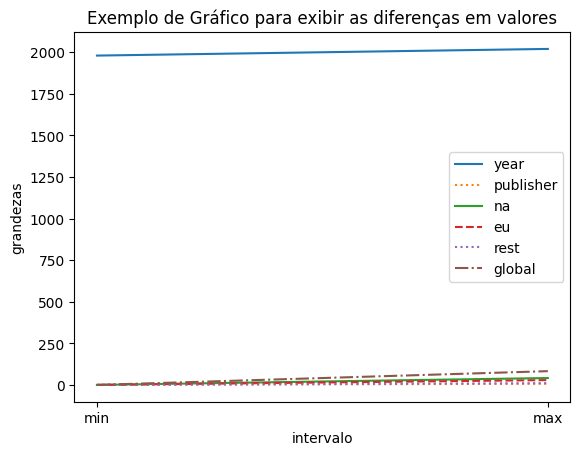

In [74]:
# porém outros valores, como ano e vendas devem ser padronizados, pois são grandezas muito diferentes
plt.plot(x, y_year, label='year', linestyle='solid')
plt.plot(x, y_publisher, label='publisher', linestyle='dotted')
plt.plot(x, y_na, label='na', linestyle='solid')
plt.plot(x, y_eu, label='eu', linestyle='dashed')
plt.plot(x, y_rest, label='rest', linestyle='dotted')
plt.plot(x, y_global, label='global', linestyle='dashdot')

plt.xlabel('intervalo')
plt.ylabel('grandezas')
plt.legend()
plt.title('Exemplo de Gráfico para exibir as diferenças em valores')
plt.show()

In [75]:
# padronizando os dados
from sklearn.preprocessing import StandardScaler

scaler_sales = StandardScaler()
X_sales = scaler_sales.fit_transform(X_sales)
X_sales

array([[-0.50105649, -0.29002846, -0.23306726, ..., 56.6079537 ,
        44.19034201, 52.37916481],
       [-0.50105649, -0.29002846, -0.23306726, ...,  6.72796668,
         3.78935651, 25.29630374],
       [-0.50105649, -0.29002846, -0.23306726, ..., 24.9623959 ,
        17.13376525, 22.47968618],
       ...,
       [-0.50105649, -0.29002846, -0.23306726, ..., -0.29130822,
        -0.25599574, -0.34001393],
       [-0.50105649, -0.29002846, -0.23306726, ..., -0.27170131,
        -0.25599574, -0.34001393],
       [-0.50105649, -0.29002846, -0.23306726, ..., -0.29130822,
        -0.25599574, -0.34001393]])

In [76]:
x = ['min', 'max']
y_year = [X_sales[:, 43].min(), X_sales[:, 43].max()]
y_publisher = [X_sales[:, 44].min(), X_sales[:, 44].max()]
y_na = [X_sales[:, 45].min(), X_sales[:, 45].max()]
y_eu = [X_sales[:, 46].min(), X_sales[:, 46].max()]
y_rest = [X_sales[:, 47].min(), X_sales[:, 47].max()]
y_global = [X_sales[:, 48].min(), X_sales[:, 48].max()]

y_year, y_publisher, y_na, y_eu, y_rest, y_global

([-4.530553423586497, 2.336416237641196],
 [-1.9599222591104755, 1.0642408678345994],
 [-0.32431079686653885, 50.03330854322125],
 [-0.2913082201613907, 56.607953702080785],
 [-0.2559957422344837, 55.27565792885873],
 [-0.3400139319380679, 52.37916480541202])

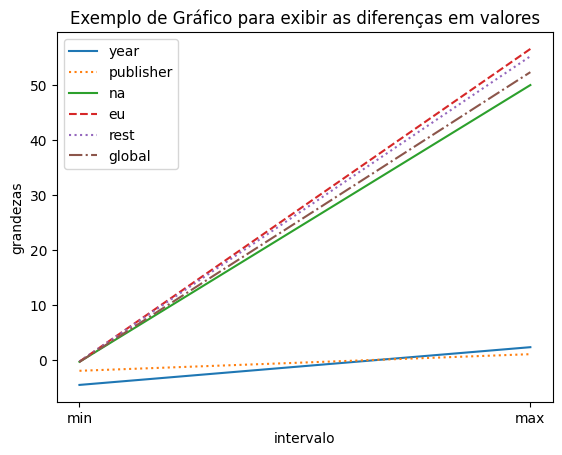

In [77]:
plt.plot(x, y_year, label='year', linestyle='solid')
plt.plot(x, y_publisher, label='publisher', linestyle='dotted')
plt.plot(x, y_na, label='na', linestyle='solid')
plt.plot(x, y_eu, label='eu', linestyle='dashed')
plt.plot(x, y_rest, label='rest', linestyle='dotted')
plt.plot(x, y_global, label='global', linestyle='dashdot')

plt.xlabel('intervalo')
plt.ylabel('grandezas')
plt.legend()
plt.title('Exemplo de Gráfico para exibir as diferenças em valores')
plt.show()

# Divisão em Treino e Teste

Dividindo para o treino ter 80% dos dados, e o teste ter 20%.

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sales, y_sales, test_size=0.2, random_state=0)

In [79]:
print('X treino:', X_train.shape)
print('y treino:', y_train.shape)
print('X teste:', X_test.shape)
print('y teste:', y_test.shape)

X treino: (13012, 49)
y treino: (13012,)
X teste: (3253, 49)
y teste: (3253,)
